In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
boston=pd.read_csv('boston.csv')
boston.head()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [20]:
corr=boston.corr()
corr['medv'].sort_values(ascending=False)#corr only for dependent variable(y) and sort it

medv       1.000000
rm         0.689598
zn         0.344842
black      0.336660
dis        0.249422
chas       0.204390
ID        -0.221694
rad       -0.352251
age       -0.358888
crim      -0.407454
nox       -0.413054
tax       -0.448078
indus     -0.473932
ptratio   -0.481376
lstat     -0.738600
Name: medv, dtype: float64

In [21]:
boston=boston[['rm','zn','black','dis','chas','medv']]

In [22]:
boston.head()

,rm,zn,black,dis,chas,medv
0,6.575,18.0,396.90,4.0900,0,24.0
1,6.421,0.0,396.90,4.9671,0,21.6
2,6.998,0.0,394.63,6.0622,0,33.4
3,7.147,0.0,396.90,6.0622,0,36.2
4,6.012,12.5,395.60,5.5605,0,22.9


In [23]:
len(boston)

333

In [24]:
#extract x,y
X=boston.iloc[:,:-1].values
y=boston.iloc[:,-1].values

In [25]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [27]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

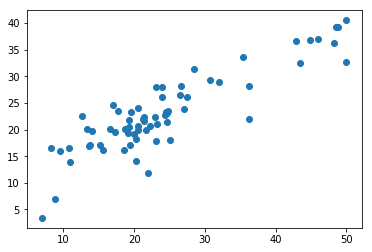

In [39]:

y_pred=regressor.predict(X_test)
plt.scatter(y_test,y_pred)


C:\Users\Satyam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.7283019176572139

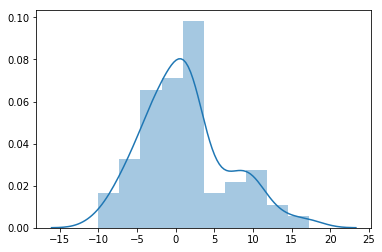

In [47]:
sns.distplot((y_test-y_pred))
from sklearn import metrics
metrics.r2_score(y_test,y_pred) #r square coefficient, measure of goodness

In [30]:
regressor.coef_  #to get all 5 coefficients of hyperplane

array([ 7.17486313,  0.06185131,  0.02306336, -0.29380008,  4.2377105 ])

In [31]:
regressor.intercept_

-30.538019014995008

In [32]:
regressor.residues_ #squared sum of all the distance from regression line,, no concept of accuray

AttributeError: 'LinearRegression' object has no attribute 'residues_'

In [33]:
#Decision tree regression
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

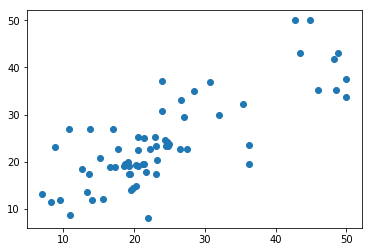

In [40]:
y_pred1=tree.predict(X_test)
y_pred1
plt.scatter(y_test,y_pred1)

C:\Users\Satyam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.6156685437065812

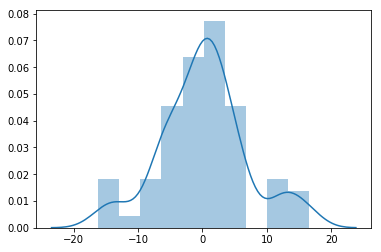

In [49]:
sns.distplot((y_test-y_pred1))
metrics.r2_score(y_test,y_pred1) #r square coefficient, measure of goodness

In [36]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=20)
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
y_pred2=forest.predict(X_test)

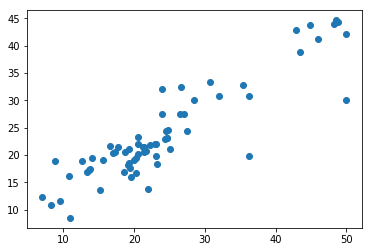

In [41]:
y_pred2
plt.scatter(y_test,y_pred2)

C:\Users\Satyam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.8052290167918752

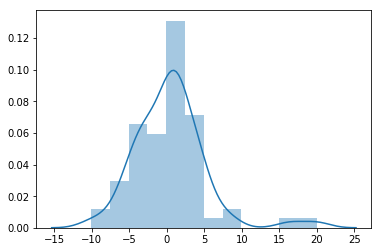

In [50]:
sns.distplot((y_test-y_pred2))
metrics.r2_score(y_test,y_pred2) #r square coefficient, measure of goodness

In [ ]:
#Which regressor to use?
decidde using R square